<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo en grupos

Primero SVM

Matriz de confusión:
[[17  0]
 [ 0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



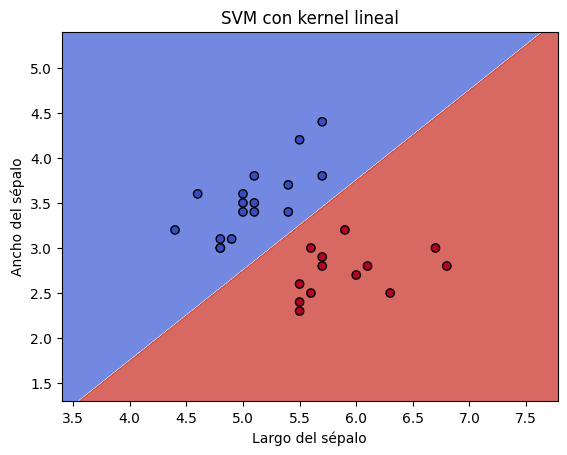

In [1]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset de ejemplo (dataset de flores Iris)
iris = datasets.load_iris()

# Solo usamos dos clases para simplificar el ejemplo (Setosa y Versicolor)
X = iris.data[:100, :2]  # Tomamos solo las dos primeras características
y = iris.target[:100]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Entrenar modelo
model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = model.predict(X_test)

# Evaluar modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualización (solo si son 2D)
def plot_svm_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Largo del sépalo')
    plt.ylabel('Ancho del sépalo')
    plt.title('SVM con kernel lineal')
    plt.show()

# Solo si tienes numpy
import numpy as np
plot_svm_decision_boundary(model, X_test, y_test)


## Ejemplo SVM con dataset Iris (3 clases, visualización con PCA)


Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



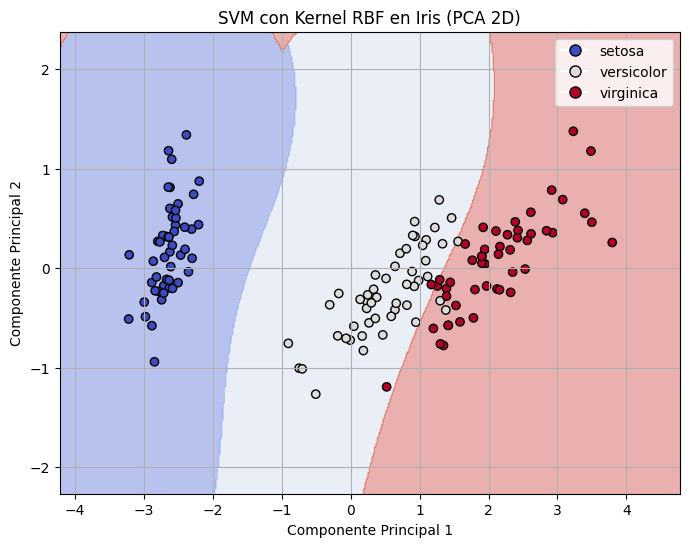

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Reducimos a 2 dimensiones para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Separar en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Crear modelo SVM con kernel RBF (puede ser 'linear', 'poly', 'rbf', 'sigmoid')
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualización de la frontera de decisión
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # paso de la grilla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Corrección aquí
    legend_labels = np.unique(y)
    handles = []
    for i, label in enumerate(legend_labels):
        handles.append(plt.Line2D([], [], marker='o', color='w',
                                  markerfacecolor=plt.cm.coolwarm(i / 2), label=target_names[label],
                                  markersize=8, markeredgecolor='k'))
    plt.legend(handles=handles)

    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.show()


plot_decision_boundary(model, X_pca, y, "SVM con Kernel RBF en Iris (PCA 2D)")


# 🧠 SVM y el Kernel Trick: Separando lo inseparable

## ¿Qué es una SVM?

Una **Máquina de Vectores de Soporte (SVM)** es un algoritmo de clasificación supervisado que busca encontrar el **hiperplano óptimo** que separa las clases con el **mayor margen** posible.

Funciona muy bien cuando los datos son linealmente separables. Pero... ¿qué pasa cuando no lo son?

---

## 🧱 El problema: datos no separables linealmente

Supongamos que tenemos datos así:

```plaintext
Clase 1: puntos dentro de un círculo
Clase 2: puntos fuera del círculo

Representación en 2D:
   ooooo
  o     o
 o   +   o
  o     o
   ooooo


Una SVM lineal no puede encontrar una frontera de decisión recta que separe estas clases.

✨ La solución: Kernel Trick
El truco de kernel permite que la SVM transforme los datos a un espacio de mayor dimensión donde sí se pueden separar linealmente. Pero lo genial es que no necesitamos hacer esa transformación de manera explícita.

En vez de transformar x → φ(x) y luego hacer un producto punto, usamos una función kernel K(x, x') = φ(x)·φ(x') que lo calcula directamente.




In [5]:
from sklearn.svm import SVC

# Kernel lineal
svc_linear = SVC(kernel='linear')

# Kernel polinomial (grado 3)
svc_poly = SVC(kernel='poly', degree=3)

# Kernel RBF
svc_rbf = SVC(kernel='rbf', gamma=0.5)

# Entrenar y predecir como siempre
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)


# 🎯 Naive Bayes con Scikit-Learn

## 📌 ¿Qué es Naive Bayes?

**Naive Bayes** es una familia de clasificadores probabilísticos basados en el **Teorema de Bayes**, con el supuesto “ingenuo” (**naive**) de que **todas las características son independientes entre sí**.

Es sorprendentemente efectivo, incluso cuando esta independencia no se cumple del todo.

---

## 📚 Teorema de Bayes

El clasificador predice la clase `y` dada una observación `x = [x₁, x₂, ..., xₙ]`, usando:

\[
P(y \mid x) = \frac{P(x \mid y) \cdot P(y)}{P(x)}
\]

En la práctica, se compara:

\[
\hat{y} = \arg\max_y \left[ P(y) \prod_{i=1}^{n} P(x_i \mid y) \right]
\]

El denominador \(P(x)\) es el mismo para todas las clases, así que se puede ignorar.

---

## 🧠 ¿Por qué "Naive"?

Porque **asume que todas las características son independientes** entre sí dado `y`, lo cual rara vez es cierto en la realidad, pero funciona muy bien en muchos casos, especialmente en:

- Clasificación de texto (spam, sentimientos, etc.)
- Problemas con muchas variables categóricas

---

## 🔧 Tipos de Naive Bayes en `scikit-learn`

| Modelo | Uso | Datos esperados |
|--------|-----|------------------|
| `GaussianNB` | Datos continuos | Distribución normal |
| `MultinomialNB` | Texto, conteos de palabras | Enteros positivos |
| `BernoulliNB` | Texto binarizado | 0s y 1s |

---

## 🧪 Ejemplo con `GaussianNB` (Iris dataset)

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = GaussianNB()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


## 🧮 ¿Cómo funciona internamente?

Para cada clase `y`, el modelo Naive Bayes estima dos cosas clave:

1. **P(y)**: La probabilidad de que ocurra cada clase (frecuencia relativa en los datos).
2. **P(xᵢ | y)**: La probabilidad de cada característica `xᵢ` dado que pertenece a la clase `y`.

### En `GaussianNB`

Asume que cada variable sigue una distribución **normal (gaussiana)** dentro de cada clase:

\[
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \cdot e^{-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}}
\]

Donde:
- \(\mu_y\) es la media de la variable `xᵢ` dentro de la clase `y`
- \(\sigma_y^2\) es la varianza dentro de la clase `y`

El clasificador predice la clase `y` que maximiza:

\[
P(y) \cdot \prod_{i=1}^{n} P(x_i \mid y)
\]

---

## 📄 Ventajas de Naive Bayes

✅ Muy rápido y eficiente, incluso con muchos datos  
✅ Funciona bien en problemas de texto, especialmente con muchas features  
✅ No requiere entrenamiento intensivo  
✅ Interpretable y fácil de implementar  
✅ Resistente a datos irrelevantes (gracias a la independencia)

---

## ❌ Desventajas

⚠️ Supone independencia total entre las características (lo que rara vez es cierto)  
⚠️ Sensible a características correlacionadas  
⚠️ Puede dar mal resultado si alguna clase tiene una probabilidad condicional cercana a 0 (se soluciona con *Laplace smoothing*)

---

## 📦 Ejemplo para texto: `MultinomialNB`

```python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

docs = ["me gusta python", "odio java", "python es genial", "java es horrible"]
y = [1, 0, 1, 0]  # 1 = positivo, 0 = negativo

# Convertimos texto a vector de conteo
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

# Entrenamos el modelo
model = MultinomialNB()
model.fit(X, y)

# Predecimos una nueva oración
nuevo = vectorizer.transform(["odio python"])
print(model.predict(nuevo))  # → [0] (negativo)


In [6]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset Iris
iris = load_iris()
X = iris.data       # Características: largo de pétalo, sépalo, etc.
y = iris.target     # Clases: setosa, versicolor, virginica

# Dividir en entrenamiento y test (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Naive Bayes (Gaussiano)
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Mostrar resultados
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Matriz de Confusión:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Dataset de ejemplo: frases cortas
textos = [
    "me encanta este producto",
    "es muy bueno y útil",
    "estoy feliz con el servicio",
    "es terrible, no me gustó",
    "odio esto, es muy malo",
    "no volvería a comprarlo",
    "excelente calidad",
    "es un desastre",
    "fantástico, lo recomiendo",
    "horrible experiencia"
]

# Etiquetas: 1 = positivo, 0 = negativo
etiquetas = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(textos, etiquetas, test_size=0.3, random_state=42)

# Crear un pipeline que vectoriza el texto y aplica Naive Bayes
modelo = make_pipeline(CountVectorizer(), MultinomialNB())

# Entrenar
modelo.fit(X_train, y_train)

# Predecir
y_pred = modelo.predict(X_test)

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["negativo", "positivo"]))


Matriz de confusión:
[[1 0]
 [2 0]]

Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.33      1.00      0.50         1
    positivo       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 👣 K-Nearest Neighbors (KNN)

## 📌 ¿Qué es KNN?

**K-Nearest Neighbors** es un algoritmo de clasificación y regresión **basado en la similitud entre los datos**.

No aprende explícitamente un modelo durante el entrenamiento. En cambio, **memoriza** todos los datos y predice una nueva instancia **mirando los "K vecinos más cercanos"**.

---

## 🤖 ¿Cómo funciona?

1. Se define un número `K` (por ejemplo, 3).
2. Para un nuevo punto que queremos clasificar:
   - Se calcula la **distancia** a todos los puntos del conjunto de entrenamiento.
   - Se seleccionan los `K` puntos más cercanos.
   - Se asigna la **clase más común** entre esos vecinos (clasificación), o se promedia el valor (regresión).

---

## 📐 Distancias comunes

- **Euclidiana** (más común):  
  \[
  d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x_i')^2}
  \]

- También se pueden usar:
  - Manhattan (`p=1`)
  - Minkowski (`p=n`)
  - Coseno (para texto o vectores)

---

## 🧠 ¿Qué representa "K"?

- Un `K` pequeño → el modelo es **muy sensible al ruido** (overfitting).
- Un `K` grande → el modelo puede **subestimar clases minoritarias** (underfitting).

Es común probar varios valores con **validación cruzada**.

---

## 📦 Ejemplo con `scikit-learn` (dataset Iris)

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Separar datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo KNN con K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar (en realidad, solo almacena los datos)
knn.fit(X_train, y_train)

# Predecir
y_pred = knn.predict(X_test)

# Evaluar
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


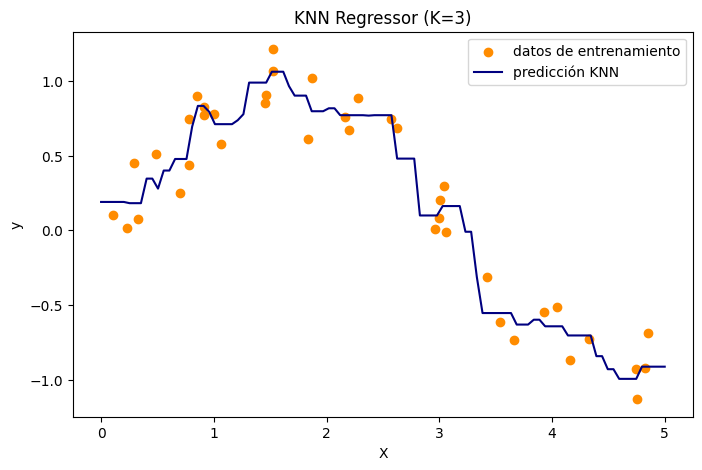

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(40)

# Crear modelo KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo
knn_reg.fit(X, y)

# Predecir nuevos valores
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = knn_reg.predict(X_test)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="darkorange", label="datos de entrenamiento")
plt.plot(X_test, y_pred, color="navy", label="predicción KNN")
plt.title("KNN Regressor (K=3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

MSE: 3.222529098870062
R² Score: 0.7033745845324662


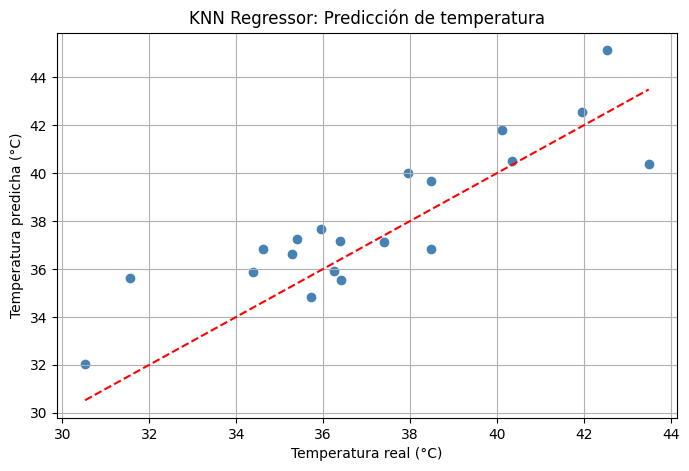

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Crear un DataFrame con medidas simuladas
np.random.seed(42)
n = 100

# Variables simuladas
humedad = np.random.uniform(30, 90, size=n)
presion = np.random.normal(1013, 10, size=n)
viento = np.random.uniform(0, 40, size=n)

# Temperatura simulada con algo de ruido
temperatura = 30 - 0.1*humedad + 0.02*presion - 0.3*viento + np.random.normal(0, 1.5, size=n)

# DataFrame
df = pd.DataFrame({
    "humedad": humedad,
    "presion": presion,
    "viento": viento,
    "temperatura": temperatura
})

# Separar variables predictoras y target
X = df[["humedad", "presion", "viento"]]
y = df["temperatura"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred = knn.predict(X_test_scaled)

# Evaluar
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualización
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Temperatura real (°C)")
plt.ylabel("Temperatura predicha (°C)")
plt.title("KNN Regressor: Predicción de temperatura")
plt.grid(True)
plt.show()


In [10]:
!wget https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv


--2025-07-10 01:17:19--  https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5978975 (5.7M) [text/plain]
Saving to: ‘Lluvia_full.csv’

Lluvia_full.csv     100%[===================>]   5.70M  --.-KB/s    in 0.1s    

2025-07-10 01:17:20 (53.9 MB/s) - ‘Lluvia_full.csv’ saved [5978975/5978975]



In [14]:
import pandas as pd

df = pd.read_csv('Lluvia_full.csv')
df.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno
